In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [ ]:
curr_path = os.getcwd()
#print(curr_path)

In [ ]:
train_path = os.path.join(curr_path, 'forests/train')
val_path = os.path.join(curr_path, 'forests/val')
#print(train_path)

In [ ]:
train_imgs = [f for f in os.listdir(os.path.join(train_path, 'images')) if f.endswith('.jpg') or f.endswith('.png')]
train_masks = [f for f in os.listdir(os.path.join(train_path, 'masks')) if f.endswith('.jpg') or f.endswith('.png')]
val_imgs = [f for f in os.listdir(os.path.join(val_path, 'images')) if f.endswith('.jpg') or f.endswith('.png')]
val_masks = [f for f in os.listdir(os.path.join(val_path, 'masks')) if f.endswith('.jpg') or f.endswith('.png')]

In [ ]:
image = Image.open(os.path.join(train_path, 'images', train_imgs[46]))
mask = Image.open(os.path.join(train_path, 'masks', train_masks[46]))

In [ ]:
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(mask) 
plt.show()

In [ ]:
edges = cv2.Canny(np.array(mask), 50, 150, apertureSize = 3)

In [ ]:
plt.imshow(edges)

In [ ]:
img = np.array(image)
msk = np.array(mask)

In [ ]:
lines_list = []

In [ ]:
lines_list = cv2.HoughLines(edges, 1, np.pi/180, 200)

In [ ]:
for line in lines_list:
    for rho,theta in line:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
        
    cv2.imwrite('hl1.jpg', img)

In [ ]:
li_img = Image.open(os.path.join(curr_path, 'hl1.jpg'))
plt.imshow(li_img)

## Probabilistic Hough Transform

In [ ]:
img = np.array(image)
msk = np.array(mask)

In [ ]:
minLineLength = 400
maxLineGap = 160

In [ ]:
lines_list_2 = []
lines_list_2 = cv2.HoughLinesP(msk, 1, np.pi/180, 200, minLineLength, maxLineGap)
for line in lines_list_2:
    for x1, y1, x2, y2 in line:
            cv2.line(img, (x1, y1), (x2,y2), (0,0,255), 2)
cv2.imwrite('hl2.jpg', img)

In [ ]:
li_img_1 = Image.open(os.path.join(curr_path, 'hl2.jpg'))
plt.imshow(li_img_1)

## Annotating Data

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

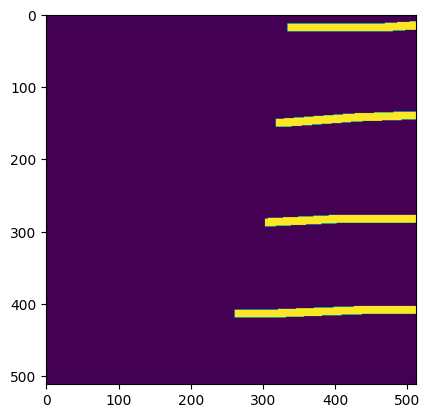

In [2]:
path = os.path.join(os.getcwd(), 'forests/train/masks/output_9216_6144.png')
mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(mask)

In [3]:
num, labels, stats, centroids = cv2.connectedComponentsWithStats(mask)

In [4]:
print(num)
print(labels)
print(stats)
print(centroids)

5
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[     0      0    512    512 252741]
 [   334     10    178     14   1989]
 [   318    135    194     21   2244]
 [   303    278    209     16   2354]
 [   261    404    251     16   2816]]
[[249.92029785 256.35504331]
 [423.54600302  17.63197587]
 [413.80882353 144.30882353]
 [405.76168224 284.26168224]
 [385.83203125 411.33203125]]


In [5]:
line_endpoints = []
for label in range(1, labels.max() + 1):  # Skip background label (0)
    msk = np.uint8(labels == label)
    x, y, w, h, _ = stats[label]
    # Implement refinement of endpoints using thinning or Hough transform
    line_endpoints.append([x, y, x + w, y + h])

print(line_endpoints)

[[np.int32(334), np.int32(10), np.int32(512), np.int32(24)], [np.int32(318), np.int32(135), np.int32(512), np.int32(156)], [np.int32(303), np.int32(278), np.int32(512), np.int32(294)], [np.int32(261), np.int32(404), np.int32(512), np.int32(420)]]


In [6]:
print(type(line_endpoints[0]))

<class 'list'>


In [7]:
def plot_points_on_image(image, points):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
    
    # Extract start and end points
    start_points = np.array([point[:2] for point in points])
    end_points = np.array([point[2:] for point in points])
    
    # Plot the image and points
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.scatter(start_points[:, 0], start_points[:, 1], color='blue', marker='o', label='Start Points')
    ax.scatter(end_points[:, 0], end_points[:, 1], color='red', marker='x', label='End Points')
    plt.legend()
    plt.show()

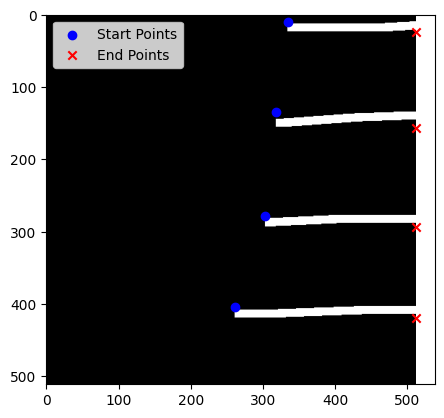

In [8]:
plot_points_on_image(mask, line_endpoints)

In [9]:
minLineLength = 1
maxLineGap = 10

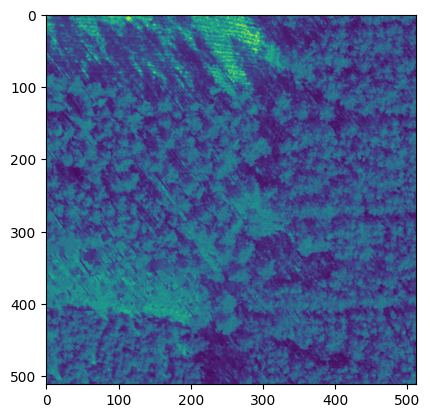

In [10]:
img_path = os.path.join(os.getcwd(), 'forests/train/images/output_9216_6144.png')
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [11]:
lines_list = []
lines_list = cv2.HoughLinesP(mask, 1, np.pi/180, 200, minLineLength, maxLineGap)

In [12]:
def draw_lines_on_blank_image(lines, image_size=(512, 512)):
  """Draws lines on a blank image.

  Args:
    lines: A list of lines, where each line is defined as [x1, y1, x2, y2].
    image_size: The desired size of the output image.
  """

  img = np.zeros((image_size[1], image_size[0], 1), dtype=np.uint8)  # Create a blank image

  for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 255, 255), 2)

  return img

In [13]:
# Create a blank image with the same size as the original image
blank_image = np.zeros_like(img)

# Draw lines on the blank image
lines_image = draw_lines_on_blank_image(lines_list, blank_image.shape)

# Save the image
cv2.imwrite('lines_only.jpg', lines_image)

True

In [14]:
p_msk = cv2.imread('lines_only.jpg', cv2.IMREAD_GRAYSCALE)

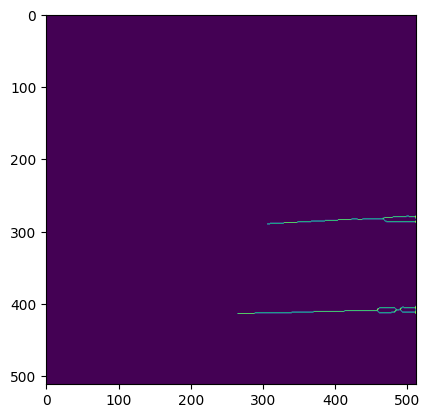

In [15]:
skel = cv2.ximgproc.thinning(p_msk, cv2.ximgproc.THINNING_GUOHALL)
plt.imshow(skel)
plt.show()

In [16]:
num_i, labels_i, stats_i, centroids_i = cv2.connectedComponentsWithStats(skel)

In [17]:
print(num_i)
print(labels_i)
print(stats_i)
print(centroids_i)

3
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[     0      0    512    512 261576]
 [   306    279    206     12    257]
 [   265    404    247     11    311]]
[[255.15190996 255.28652093]
 [424.81322957 284.87159533]
 [408.35691318 410.78135048]]


In [27]:
line_endpoints_2 = []

for label in range(1, labels_i.max() + 1):  # Skip background label (0)
    msk = np.uint8(labels_i == label)
    x, y, w, h, _ = stats[label]
    # Implement refinement of endpoints using thinning or Hough transform
    line_endpoints_2.append([x, y, x + w, y + h])

print(line_endpoints_2)

[[np.int32(334), np.int32(10), np.int32(512), np.int32(24)], [np.int32(318), np.int32(135), np.int32(512), np.int32(156)]]


In [26]:
def sa_metric(angle_p, angle_g):
    d_angle = np.abs(angle_p - angle_g)
    d_angle = min(d_angle, np.pi - d_angle)
    d_angle = d_angle * 2 / np.pi
    return max(0, (1 - d_angle)) ** 2

def se_metric(coord_p, coord_g, size=(512, 512)):
    c_p = [(coord_p[0] + coord_p[2]) / 2, (coord_p[1] + coord_p[3]) / 2]
    c_g = [(coord_g[0] + coord_g[2]) / 2, (coord_g[1] + coord_g[3]) / 2]
    d_coord = np.abs(c_p[0] - c_g[0])**2 + np.abs(c_p[1] - c_g[1])**2
    d_coord = np.sqrt(d_coord) / max(size[0], size[1])
    return max(0, (1 - d_coord)) ** 2

def EA_metric(l_pred, l_gt, size=(512, 512)):
    se = se_metric(l_pred.coord, l_gt.coord, size=size)
    sa = sa_metric(l_pred.angle(), l_gt.angle())
    return sa * se    

In [25]:
l1 = Line([334, 10, 512, 24])
l2 = Line([334, 10, 512, 24])
print(EA_metric(l1, l2))

1.0


In [23]:
class Line(object):
    def __init__(self, coordinates=[0, 0, 1, 1]):
        """
        coordinates: [y0, x0, y1, x1]
        """
        assert isinstance(coordinates, list)
        assert len(coordinates) == 4
        assert coordinates[0]!=coordinates[2] or coordinates[1]!=coordinates[3]
        self.__coordinates = coordinates

    @property
    def coord(self):
        return self.__coordinates

    @property
    def length(self):
        start = np.array(self.coord[:2])
        end = np.array(self.coord[2::])
        return np.sqrt(((start - end) ** 2).sum())

    def angle(self):
        y0, x0, y1, x1 = self.coord
        if x0 == x1:
            return -np.pi / 2
        return np.arctan((y0-y1) / (x0-x1))

    def rescale(self, rh, rw):
        coor = np.array(self.__coordinates)
        r = np.array([rh, rw, rh, rw])
        self.__coordinates = np.round(coor * r).astype(np.int).tolist()

    def __repr__(self):
        return str(self.coord)